# _Transformer_

<hr>
<hr>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})
df

### 1. _Quantile Transformer_ ```QuantileTransformer()```

-  _Uniform Distribution_ & _Standard Normal Distribution_

```from sklearn.preprocessing import QuantileTransformer```

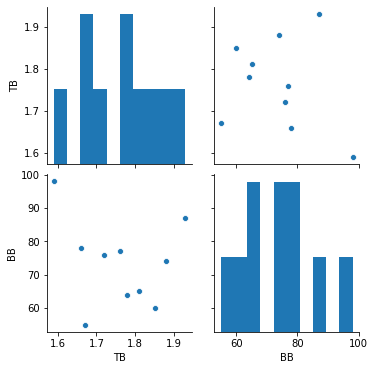

In [4]:
sb.pairplot(df)
plt.show()

In [5]:
from sklearn.preprocessing import QuantileTransformer

In [6]:
qunitrans = QuantileTransformer(output_distribution='uniform')
qnortrans = QuantileTransformer(output_distribution='normal')

In [7]:
quni = qunitrans.fit_transform(df[['TB', 'BB']])
qnor = qnortrans.fit_transform(df[['TB', 'BB']])

df['TB quni'] = quni[:, 0]
df['BB quni'] = quni[:, 1]
df['TB qnor'] = qnor[:, 0]
df['BB qnor'] = qnor[:, 1]

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_data.py:2354: UserWarning: n_quantiles (1000) is greater than the total number of samples (10). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_data.py:2354: UserWarning: n_quantiles (1000) is greater than the total number of samples (10). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [ ]:
sb.pairplot(df)
plt.show()

<hr>

### 2. _Quantile Transformer_ ```quantile_transform()```

- _Uniform Distribution_ & _Normal Distribution_

```from sklearn.preprocessing import quantile_transform```

In [9]:
from sklearn.preprocessing import quantile_transform

In [ ]:
quantile_transform(df[['TB', 'BB']], output_distribution='uniform')

In [ ]:
# keuntungan uniform distribution : setiap data memiliki frekuensi yang sama

# keuntungan normal distribution : frekuensi terbanyak terdapat di nilai tengah / mean

<hr>

### 3. _Normalize Transformer_ 

- by default its working on rows not features

In [10]:
dfA = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})

#### Manual Calculation

- 3 ways to Normalize:
    - Maximum Normalize $\displaystyle x_\textrm{norm} = \frac {x} {x_\textrm{max}} $
    
    - L1 Normalize $\displaystyle x_\textrm{norm} = \frac {x} {\sum{x}} $
    
    - L2 Normalize $\displaystyle x_\textrm{norm} = \frac {x} {\sqrt{\sum x^2}} $

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ss = scaler.fit_transform(dfA[['TB', 'BB']])
dfA['ss TB'] = ss[:,0]
dfA['ss BB'] = ss[:,1]
dfA.head()

#### MAXIMUM NORMALIZE
<hr>

In [ ]:
x = []
for i in range(len(dfA)):
    data = dfA.iloc[i][['ss TB', 'ss BB']] / dfA.iloc[i][['ss TB', 'ss BB']].max()
    x.append(data.tolist())
x = np.array(x)

dfA['ss TB nmax'] = x[:,0]
dfA['ss BB nmax'] = x[:,1]
dfA

#### L1 NORMALIZE
<hr>

In [23]:
y = []
for i in range(len(dfA)):
    data = dfA.iloc[i][['ss TB', 'ss BB']] / dfA.iloc[i][['ss TB', 'ss BB']].sum()
    y.append(data.tolist())
y = np.array(y)

dfA['ss TB L1'] = y[:,0]
dfA['ss BB L1'] = y[:,1]
dfA

,TB,BB,ss TB,ss BB,ss TB nmax,ss BB nmax,ss TB L1,ss BB L2,ss TB L2,ss BB L1
0,1.72,76,-0.444153,0.211697,-2.098060,1.000000,1.910697,0.430258,-0.902706,-0.910697
1,1.81,65,0.444153,-0.683945,1.000000,-1.539884,-1.852250,-0.838674,0.544634,2.852250
2,1.93,87,1.628563,1.107339,1.000000,0.679949,0.595256,0.562281,0.826946,0.404744
3,1.67,55,-0.937657,-1.498165,1.000000,1.597774,0.384945,-0.847666,-0.530530,0.615055
4,1.85,60,0.838957,-1.091055,1.000000,-1.300490,-3.327895,-0.792735,0.609566,4.327895
5,1.66,78,-1.036358,0.374541,-2.767007,1.000000,1.565929,0.339886,-0.940467,-0.565929
6,1.59,98,-1.727263,2.002981,-0.862346,1.000000,-6.264609,0.757306,-0.653060,7.264609
7,1.76,77,-0.049350,0.293119,-0.168363,1.000000,-0.202447,0.986121,-0.166026,1.202447
8,1.88,74,1.135059,0.048853,1.000000,0.043040,0.958736,0.043000,0.999075,0.041264
9,1.78,64,0.148051,-0.765367,1.000000,-5.169610,-0.239831,-0.981800,0.189918,1.239831


#### L2 NORMALIZE

<hr>

In [22]:
z = []
for i in range(len(dfA)):
    data = dfA.iloc[i][['ss TB', 'ss BB']] / np.sqrt(np.sum(dfA.iloc[i][['ss TB', 'ss BB']]**2))
    z.append(data.tolist())
z = np.array(z)

dfA['ss TB L2'] = z[:, 0]
dfA['ss BB L2'] = z[:, 1]
dfA


,TB,BB,ss TB,ss BB,ss TB nmax,ss BB nmax,ss TB L1,ss BB L2,ss TB L2
0,1.72,76,-0.444153,0.211697,-2.098060,1.000000,1.910697,0.430258,-0.902706
1,1.81,65,0.444153,-0.683945,1.000000,-1.539884,-1.852250,-0.838674,0.544634
2,1.93,87,1.628563,1.107339,1.000000,0.679949,0.595256,0.562281,0.826946
3,1.67,55,-0.937657,-1.498165,1.000000,1.597774,0.384945,-0.847666,-0.530530
4,1.85,60,0.838957,-1.091055,1.000000,-1.300490,-3.327895,-0.792735,0.609566
5,1.66,78,-1.036358,0.374541,-2.767007,1.000000,1.565929,0.339886,-0.940467
6,1.59,98,-1.727263,2.002981,-0.862346,1.000000,-6.264609,0.757306,-0.653060
7,1.76,77,-0.049350,0.293119,-0.168363,1.000000,-0.202447,0.986121,-0.166026
8,1.88,74,1.135059,0.048853,1.000000,0.043040,0.958736,0.043000,0.999075
9,1.78,64,0.148051,-0.765367,1.000000,-5.169610,-0.239831,-0.981800,0.189918


### SKlearn Calculation ```normalize()```

```from sklearn.preprocessing import normalize```

<hr>

In [25]:
dfB = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})

scaler = StandardScaler()
ss = scaler.fit_transform(dfB[['TB', 'BB']])
dfB['ss TB'] = ss[:,0]
dfB['ss BB'] = ss[:,1]
dfB.head()

,TB,BB,ss TB,ss BB
0,1.72,76,-0.444153,0.211697
1,1.81,65,0.444153,-0.683945
2,1.93,87,1.628563,1.107339
3,1.67,55,-0.937657,-1.498165
4,1.85,60,0.838957,-1.091055


In [26]:
from sklearn.preprocessing import normalize

In [27]:
nmax = normalize(dfB[['ss TB', 'ss BB']], norm='max')
l1 = normalize(dfB[['ss TB', 'ss BB']], norm='l1')
l2 = normalize(dfB[['ss TB', 'ss BB']], norm='l2')

dfB['ss TB nmax'] = nmax[:,0]
dfB['ss BB nmax'] = nmax[:,1]
dfB['ss TB L1'] = l1[:,0]
dfB['ss BB L1'] = l1[:,1]
dfB['ss TB L2'] = l2[:,0]
dfB['ss BB L2'] = l2[:,1]

dfB.head()

,TB,BB,ss TB,ss BB,ss TB nmax,ss BB nmax,ss TB L1,ss BB L1,ss TB L2,ss BB L2
0,1.72,76,-0.444153,0.211697,-2.09806,1.000000,-0.677217,0.322783,-0.902706,0.430258
1,1.81,65,0.444153,-0.683945,1.00000,-1.539884,0.393719,-0.606281,0.544634,-0.838674
2,1.93,87,1.628563,1.107339,1.00000,0.679949,0.595256,0.404744,0.826946,0.562281
3,1.67,55,-0.937657,-1.498165,1.00000,1.597774,-0.384945,-0.615055,-0.530530,-0.847666
4,1.85,60,0.838957,-1.091055,1.00000,-1.300490,0.434690,-0.565310,0.609566,-0.792735


### SKlearn Calculation ```normalizer()```

```from sklearn.preprocessing import Normalizer```

In [28]:
from sklearn.preprocessing import Normalizer

In [32]:
dfC = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})

scaler = StandardScaler()
ss = scaler.fit_transform(dfB[['TB', 'BB']])
dfC['ss TB'] = ss[:,0]
dfC['ss BB'] = ss[:,1]
dfC.head()

,TB,BB,ss TB,ss BB
0,1.72,76,-0.444153,0.211697
1,1.81,65,0.444153,-0.683945
2,1.93,87,1.628563,1.107339
3,1.67,55,-0.937657,-1.498165
4,1.85,60,0.838957,-1.091055


In [33]:
normMax = Normalizer(norm='max')
normL1 = Normalizer(norm='l1')
normL2 = Normalizer(norm='l2')

In [37]:
nmax = normMax.fit_transform(dfC[['ss TB', 'ss BB']])
l1 = normL1.fit_transform(dfC[['ss TB', 'ss BB']])
l2 = normL2.fit_transform(dfC[['ss TB', 'ss BB']])

dfC['ss TB nmax'] = nmax[:,0]
dfC['ss BB nmax'] = nmax[:,1]
dfC['ss TB L1'] = l1[:,0]
dfC['ss BB L1'] = l1[:,1]
dfC['ss TB L2'] = l2[:,0]
dfC['ss BB L2'] = l2[:,1]

dfC

,TB,BB,ss TB,ss BB,ss TB nmax,ss BB nmax,ss TB L1,ss BB L2,ss BB L1,ss TB L2
0,1.72,76,-0.444153,0.211697,-2.098060,1.000000,-0.677217,0.430258,0.322783,-0.902706
1,1.81,65,0.444153,-0.683945,1.000000,-1.539884,0.393719,-0.838674,-0.606281,0.544634
2,1.93,87,1.628563,1.107339,1.000000,0.679949,0.595256,0.562281,0.404744,0.826946
3,1.67,55,-0.937657,-1.498165,1.000000,1.597774,-0.384945,-0.847666,-0.615055,-0.530530
4,1.85,60,0.838957,-1.091055,1.000000,-1.300490,0.434690,-0.792735,-0.565310,0.609566
5,1.66,78,-1.036358,0.374541,-2.767007,1.000000,-0.734537,0.339886,0.265463,-0.940467
6,1.59,98,-1.727263,2.002981,-0.862346,1.000000,-0.463043,0.757306,0.536957,-0.653060
7,1.76,77,-0.049350,0.293119,-0.168363,1.000000,-0.144102,0.986121,0.855898,-0.166026
8,1.88,74,1.135059,0.048853,1.000000,0.043040,0.958736,0.043000,0.041264,0.999075
9,1.78,64,0.148051,-0.765367,1.000000,-5.169610,0.162085,-0.981800,-0.837915,0.189918
